Перед вами введение в синтаксис PyTorch, заимствованное с [официального сайта](https://pytorch.org/tutorials/index.html) фрэймворка

По [данной](https://rickwierenga.com/blog/machine%20learning/numpy-vs-pytorch-linalg.html) ссылке находится также очень познавательная статья о сравнении библиотек `numpy` и `PyTorch` 


In [1]:
%matplotlib inline


Introduction to PyTorch
***********************

Introduction to Torch's tensor library
======================================

All of deep learning is computations on tensors, which are
generalizations of a matrix that can be indexed in more than 2
dimensions. We will see exactly what this means in-depth later. First,
let's look what we can do with tensors.



In [2]:
# Author: Robert Guthrie

import torch

torch.manual_seed(1)

Creating Tensors
~~~~~~~~~~~~~~~~

Tensors can be created from Python lists with the torch.tensor()
function.




In [3]:
# torch.tensor(data) creates a torch.Tensor object with the given data.
V_data = [1., 2., 3.]
V = torch.tensor(V_data)
print(V)

# Creates a matrix
M_data = [[1., 2., 3.], [4., 5., 6]]
M = torch.tensor(M_data)
print(M)

# Create a 3D tensor of size 2x2x2.
T_data = [[[1., 2.], [3., 4.]],
          [[5., 6.], [7., 8.]]]
T = torch.tensor(T_data)
print(T)

tensor([1., 2., 3.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


What is a 3D tensor anyway? Think about it like this. If you have a
vector, indexing into the vector gives you a scalar. If you have a
matrix, indexing into the matrix gives you a vector. If you have a 3D
tensor, then indexing into the tensor gives you a matrix!

A note on terminology:
when I say "tensor" in this tutorial, it refers
to any torch.Tensor object. Matrices and vectors are special cases of
torch.Tensors, where their dimension is 2 and 1 respectively. When I am
talking about 3D tensors, I will explicitly use the term "3D tensor".




In [4]:
# Index into V and get a scalar (0 dimensional tensor)
print(V[0])
# Get a Python number from it
print(V[0].item())

# Index into M and get a vector
print(M[0])

# Index into T and get a matrix
print(T[0])

tensor(1.)
1.0
tensor([1., 2., 3.])
tensor([[1., 2.],
        [3., 4.]])


You can also create tensors of other data types. To create a tensor of integer types, try
torch.tensor([[1, 2], [3, 4]]) (where all elements in the list are integers).
You can also specify a data type by passing in ``dtype=torch.data_type``.
Check the documentation for more data types, but
Float and Long will be the most common.




You can create a tensor with random data and the supplied dimensionality
with torch.randn()




In [5]:
x = torch.randn((3, 4, 5))
print(x)

tensor([[[-1.5256, -0.7502, -0.6540, -1.6095, -0.1002],
         [-0.6092, -0.9798, -1.6091, -0.7121,  0.3037],
         [-0.7773, -0.2515, -0.2223,  1.6871,  0.2284],
         [ 0.4676, -0.6970, -1.1608,  0.6995,  0.1991]],

        [[ 0.8657,  0.2444, -0.6629,  0.8073,  1.1017],
         [-0.1759, -2.2456, -1.4465,  0.0612, -0.6177],
         [-0.7981, -0.1316,  1.8793, -0.0721,  0.1578],
         [-0.7735,  0.1991,  0.0457,  0.1530, -0.4757]],

        [[-0.1110,  0.2927, -0.1578, -0.0288,  0.4533],
         [ 1.1422,  0.2486, -1.7754, -0.0255, -1.0233],
         [-0.5962, -1.0055,  0.4285,  1.4761, -1.7869],
         [ 1.6103, -0.7040, -0.1853, -0.9962, -0.8313]]])


Operations with Tensors
~~~~~~~~~~~~~~~~~~~~~~~

You can operate on tensors in the ways you would expect.



In [6]:
x = torch.tensor([1., 2., 3.])
y = torch.tensor([4., 5., 6.])
z = x + y
print(z)

tensor([5., 7., 9.])


See `the documentation <https://pytorch.org/docs/torch.html>`__ for a
complete list of the massive number of operations available to you. They
expand beyond just mathematical operations.

One helpful operation that we will make use of later is concatenation.




In [7]:
# By default, it concatenates along the first axis (concatenates rows)
x_1 = torch.randn(2, 5)
y_1 = torch.randn(3, 5)
z_1 = torch.cat([x_1, y_1])
print(z_1)

# Concatenate columns:
x_2 = torch.randn(2, 3)
y_2 = torch.randn(2, 5)
# second arg specifies which axis to concat along
z_2 = torch.cat([x_2, y_2], 1)
print(z_2)

# If your tensors are not compatible, torch will complain.  Uncomment to see the error
# torch.cat([x_1, x_2])

tensor([[-0.8029,  0.2366,  0.2857,  0.6898, -0.6331],
        [ 0.8795, -0.6842,  0.4533,  0.2912, -0.8317],
        [-0.5525,  0.6355, -0.3968, -0.6571, -1.6428],
        [ 0.9803, -0.0421, -0.8206,  0.3133, -1.1352],
        [ 0.3773, -0.2824, -2.5667, -1.4303,  0.5009]])
tensor([[ 0.5438, -0.4057,  1.1341, -0.1473,  0.6272,  1.0935,  0.0939,  1.2381],
        [-1.1115,  0.3501, -0.7703, -1.3459,  0.5119, -0.6933, -0.1668, -0.9999]])


__Tensor__ -- это такой же массив, как и в __numpy.array__, размерность и тип данных которого мы можем задать. Tensor в отличие от numpy.array может вычисляться на __GPU__.

In [8]:
import numpy as np
import torch

In [9]:
N = 100
D_in = 50

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

x = np.random.randn(N, D_in)
x_torch = torch.randn(N, D_in, device=device, dtype=dtype)

In [10]:
x

array([[-0.2638648 , -0.03437633, -0.55319802, ..., -0.41123931,
         0.06231457, -0.0491905 ],
       [-0.76795562,  0.53951991,  2.51172327, ...,  0.36734818,
        -1.46713249,  0.3205242 ],
       [ 0.26242508,  1.07044624, -0.24636752, ..., -2.06805073,
        -1.19888866, -0.87439356],
       ...,
       [ 1.12794418,  0.03246402, -0.84432362, ..., -0.04745605,
        -0.8425033 , -0.83633349],
       [-0.2640023 , -0.9578809 , -0.26502743, ...,  0.12074524,
        -0.35128336, -0.63252617],
       [ 1.21576708,  1.23577092, -0.60666519, ..., -0.7880213 ,
         1.49426713,  0.80292239]])

In [11]:
x_torch

tensor([[ 0.4175, -0.2127, -0.8400,  ...,  0.0571,  0.9055,  1.0463],
        [-0.5206,  1.3548,  0.2352,  ...,  0.8956,  0.1675,  0.7514],
        [ 2.4142,  1.0206, -0.4405,  ...,  2.3403, -0.6116,  0.8160],
        ...,
        [-0.4154, -0.2963,  0.5661,  ...,  0.7328, -0.2776,  0.3650],
        [-1.7876, -0.1829,  1.5955,  ...,  0.5376, -1.7307,  1.5791],
        [ 0.4305,  1.4203,  0.2883,  ...,  0.7285, -0.4101, -0.4788]])

In [12]:
np.ones((N, D_in))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [13]:
x_torch = torch.Tensor(np.ones((N, D_in)))
x_torch

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

На [странице](https://pytorch.org/docs/stable/tensors.html) приведено описания различных численных форматов `torch.Tensor`

In [14]:
x_torch = torch.FloatTensor([1, 2, 3])
x_torch

tensor([1., 2., 3.])

In [15]:
x1 = torch.IntTensor([1, 2, 3])
x2 = torch.FloatTensor([3, 4, 5])

In [16]:
x1, x2

(tensor([1, 2, 3], dtype=torch.int32), tensor([3., 4., 5.]))

В PyTorch можно найти много операций, которые похожи на то, что есть в numpy :
```
- torch.add (np.add) -> сложение тензоров (поэлементное)
- torch.sub (np.subtract) -> вычитание (поэлементное)
- torch.mul (np.multiply) -> умнажение скаляров / матриц (поэлементное)
- torch.mm (np.matmul) -> перемножение матриц
- torch.ones (np.ones) -> создание тензора из единиц
```

Давайте попробуем вышепересчисленные операции

In [17]:
a = torch.tensor([1,2,3])
b = torch.ones_like(a)
print(a, b)
torch.add(a, b), a.add(b)

tensor([1, 2, 3]) tensor([1, 1, 1])


(tensor([2, 3, 4]), tensor([2, 3, 4]))

In [18]:
x1 = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
x1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [19]:
x2 = torch.FloatTensor([[7, 8], [9, 1], [2, 3]])
x2

tensor([[7., 8.],
        [9., 1.],
        [2., 3.]])

In [20]:
out = torch.mm(x1, x2)
out

tensor([[31., 19.],
        [85., 55.]])

In [21]:
torch.ones((3, 3))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [22]:
print(torch.ones_like(x1))
print()
print(torch.ones_like(x2))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


Reshaping Tensors
~~~~~~~~~~~~~~~~~

Use the .view() method to reshape a tensor. This method receives heavy
use, because many neural network components expect their inputs to have
a certain shape. Often you will need to reshape before passing your data
to the component.




In [23]:
x = torch.randn(2, 3, 4)
print(x, '\n\n')
print(x.view(2, 12))  # Reshape to 2 rows, 12 columns
# Same as above.  If one of the dimensions is -1, its size can be inferred
print(x.view(2, -1))

tensor([[[-0.0286, -0.8836,  0.0909, -0.4940],
         [ 1.3182, -0.0845,  1.1725, -0.7763],
         [-2.6301, -1.7034,  0.4825, -1.0118]],

        [[-0.5213, -0.6625, -0.0301,  0.4308],
         [-1.3608, -1.6181, -0.6584,  1.5646],
         [ 1.4422, -0.3800,  0.0816,  1.5062]]]) 


tensor([[-0.0286, -0.8836,  0.0909, -0.4940,  1.3182, -0.0845,  1.1725, -0.7763,
         -2.6301, -1.7034,  0.4825, -1.0118],
        [-0.5213, -0.6625, -0.0301,  0.4308, -1.3608, -1.6181, -0.6584,  1.5646,
          1.4422, -0.3800,  0.0816,  1.5062]])
tensor([[-0.0286, -0.8836,  0.0909, -0.4940,  1.3182, -0.0845,  1.1725, -0.7763,
         -2.6301, -1.7034,  0.4825, -1.0118],
        [-0.5213, -0.6625, -0.0301,  0.4308, -1.3608, -1.6181, -0.6584,  1.5646,
          1.4422, -0.3800,  0.0816,  1.5062]])


```
- torch.reshape или tensor.view (где tensor-это объект torch.tensor) -> изменения порядка элементов в тензоре, не путать с транспонированием.
```

In [24]:
print(x1, '\n\n')
x1.t()

tensor([[1., 2., 3.],
        [4., 5., 6.]]) 




tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [25]:
torch.reshape(x1, (-1, 2))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [26]:
x1.view((-1, 2))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [27]:
x1 = x1.reshape_as(x2)
x1

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [28]:
x1 = x1.type(torch.int)

print(f'x1 type: {x1.dtype} \nx2 type: {x2.dtype} \n\n')
x1 + x2

x1 type: torch.int32 
x2 type: torch.float32 




tensor([[ 8., 10.],
        [12.,  5.],
        [ 7.,  9.]])

Computation Graphs and Automatic Differentiation
================================================

The concept of a computation graph is essential to efficient deep
learning programming, because it allows you to not have to write the
back propagation gradients yourself. A computation graph is simply a
specification of how your data is combined to give you the output. Since
the graph totally specifies what parameters were involved with which
operations, it contains enough information to compute derivatives. This
probably sounds vague, so let's see what is going on using the
fundamental flag ``requires_grad``.

First, think from a programmers perspective. What is stored in the
torch.Tensor objects we were creating above? Obviously the data and the
shape, and maybe a few other things. But when we added two tensors
together, we got an output tensor. All this output tensor knows is its
data and shape. It has no idea that it was the sum of two other tensors
(it could have been read in from a file, it could be the result of some
other operation, etc.)

**Important:** If ``requires_grad=True``, the Tensor object keeps track of how it was
created. Let's see it in action.




In [31]:
# Tensor factory methods have a ``requires_grad`` flag
x = torch.tensor([1., 2., 3], requires_grad=True)

# With requires_grad=True, you can still do all the operations you previously
# could
y = torch.tensor([4., 5., 6], requires_grad=True)
t = x + y
print(t)

# BUT t knows something extra.
print(t.grad_fn)

tensor([5., 7., 9.], grad_fn=<AddBackward0>)


So Tensors know what created them. t knows that it wasn't read in from
a file, it wasn't the result of a multiplication or exponential or
whatever. And if you keep following t.grad_fn, you will find yourself at
x and y.

But how does that help us compute a gradient?




In [32]:
# Let's sum up all the entries in z
s = t.sum()
print(s)
print(s.grad_fn)

tensor(21., grad_fn=<SumBackward0>)


So now, what is the derivative of this sum with respect to the first
component of x? In math, we want

\begin{align}\frac{\partial s}{\partial x_0}\end{align}



Well, s knows that it was created as a sum of the tensor z. z knows
that it was the sum x + y. So

\begin{align}s = \overbrace{x_0 + y_0}^\text{$z_0$} + \overbrace{x_1 + y_1}^\text{$z_1$} + \overbrace{x_2 + y_2}^\text{$z_2$}\end{align}

And so s contains enough information to determine that the derivative
we want is 1!

Of course this glosses over the challenge of how to actually compute
that derivative. The point here is that s is carrying along enough
information that it is possible to compute it. In reality, the
developers of Pytorch program the sum() and + operations to know how to
compute their gradients, and run the back propagation algorithm. An
in-depth discussion of that algorithm is beyond the scope of this
tutorial.




Let's have Pytorch compute the gradient, and see that we were right:
(note if you run this block multiple times, the gradient will increment.
That is because Pytorch *accumulates* the gradient into the .grad
property, since for many models this is very convenient.)




In [33]:
print(x)

tensor([1., 2., 3.], requires_grad=True)


In [34]:
# optimizer.zero_grad()

In [35]:
# calling .backward() on any variable will run backprop, starting from it.
s.backward()
print(x.grad)

tensor([1., 1., 1.])


Understanding what is going on in the block below is crucial for being a
successful programmer in deep learning.




In [36]:
x = torch.randn(2, 2)
y = torch.randn(2, 2)
# By default, user created Tensors have ``requires_grad=False``
print(x.requires_grad, y.requires_grad)
z = x + y
# So you can't backprop through z
print(z.grad_fn)

# ``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
# flag in-place. The input flag defaults to ``True`` if not given.
x = x.requires_grad_()
y = y.requires_grad_()
# z contains enough information to compute gradients, as we saw above
z = x + y
print(z.grad_fn)
# If any input to an operation has ``requires_grad=True``, so will the output
print(z.requires_grad)

# Now z has the computation history that relates itself to x and y
# Can we just take its values, and **detach** it from its history?
new_z = z.detach()

# ... does new_z have information to backprop to x and y?
# NO!
print(new_z.grad_fn)
# And how could it? ``z.detach()`` returns a tensor that shares the same storage
# as ``z``, but with the computation history forgotten. It doesn't know anything
# about how it was computed.
# In essence, we have broken the Tensor away from its past history

False False
None
True
None


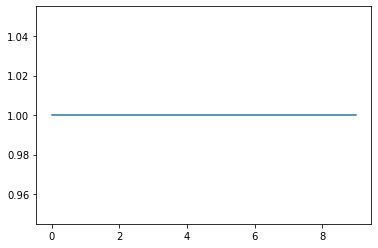

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

x = torch.ones([10], requires_grad=True)
# plt.plot(x)  # doesn't work
plt.plot(x.detach())

You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` by wrapping the code block in
``with torch.no_grad():``



In [37]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)


True
True
False


### Зачем нужно делать zero_grad()?

If a tensor already has grad attribute, e.g from the previous call to backward, subsequent calls will add to the value of this attribute. So, if you, e.g, backward() in a loop, you need to explicitely set grad to zero each time.

In [38]:
x = torch.tensor([1.], requires_grad=True)
x.grad is None

True

In [39]:
a = x * 2
b = x * 3
y = a + b  # == x * 5
# in this case y.backward() is the same as
a.backward()
b.backward()
x.grad

tensor([5.])

In [40]:
x = torch.tensor([1.], requires_grad=True)
print(x.grad is None)
a = x * 2
b = x * 3
a.backward()
print(x.grad)
b.backward()
print(x.grad)

True
tensor([2.])
tensor([5.])


In [41]:
x = torch.tensor([1.], requires_grad=True)
for i in range(2):
    y = x * 2
    y.backward()
    print(x.grad)

tensor([2.])
tensor([4.])


In [43]:
x = torch.tensor([1.], requires_grad=True)
for i in range(2):
    y = x * 2
    y.backward()
    print(x.grad)
    x.grad.zero_()

tensor([2.])
tensor([2.])
